In [35]:
img_p = "/content/drive/MyDrive/ML Caption Craft/Likable Images/1177553106226591544.jpg"

### libs

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
import re

import string
from bs4 import BeautifulSoup
# import requests
# from collections import Counter
# from num2words import num2words
from wordcloud import WordCloud, ImageColorGenerator
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
# import spacy
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

import nltk
import warnings
warnings.filterwarnings("ignore")

# from nltk.corpus import stopwords
# from google.colab import drive
# drive.mount('/content/drive')

pd.set_option('max_colwidth', 99999)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
import os
# import datasets
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
from tqdm.auto import tqdm
import multiprocessing as mp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import io, transforms
from torch.utils.data import Dataset, DataLoader, random_split
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, ViTImageProcessor
from transformers import AutoTokenizer ,  GPT2Config , default_data_collator

# Predictions

In [36]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [37]:
def build_inputs_with_special_tokens(self, token_ids_0, token_ids_1=None):
    outputs = [self.bos_token_id] + token_ids_0 + [self.eos_token_id]
    return outputs

In [38]:
model_directory = "/content/drive/MyDrive/ML Caption Craft/Image_Caption_Generator"
# tokenizer = AutoTokenizer.from_pretrained(model_directory)
# Load the saved model
model = VisionEncoderDecoderModel.from_pretrained(model_directory)



AutoTokenizer.build_inputs_with_special_tokens = build_inputs_with_special_tokens
os.environ["WANDB_DISABLED"] = "true"
# configuration of training
class config :
    TRAIN_BATCH_SIZE = 10
    VAL_BATCH_SIZE = 10
    VAL_EPOCHS = 1
    LR = 5e-5
    SEED = 42
    MAX_LEN = 128
    SUMMARY_LEN = 20
    WEIGHT_DECAY = 0.01
    MEAN = (0.485, 0.456, 0.406)
    STD = (0.229, 0.224, 0.225)
    TRAIN_PCT = 0.95
    NUM_WORKERS = mp.cpu_count()
    EPOCHS = 3
    IMG_SIZE = (224, 224)
    LABEL_MASK = -100
    TOP_K = 1000
    TOP_P = 0.95

# rouge evaluation metric
# rouge = datasets.load_metric("rouge")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer.pad_token = tokenizer.unk_token


In [39]:
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [40]:
# i = 17000
# caption = likable_data.iloc[i].caption
# preprocessed_captions = likable_data.iloc[i].preprocessed_captions
# img_p = likable_data.iloc[i].img_p

In [41]:
# root_dir= "/content/drive/MyDrive/ML Caption Craft/Likable Images"
path = img_p

In [42]:
img =  Image.open(path).convert("RGB")

In [43]:
generated_caption = tokenizer.decode(model.generate(feature_extractor(img, return_tensors="pt").pixel_values.to(device))[0])
# generated_caption = tokenizer.decode(model.generate(feature_extractor(img, return_tensors="pt").pixel_values)[0])

In [44]:
pred = pd.DataFrame({'pred': [generated_caption]})
pred['pred'] = pred['pred'].str.replace('<\|endoftext\|>','')
pred = pred['pred'].iloc[0].split("   ")

In [45]:
pred

['i am so excited to be able to share this look with you all',
 ' it is so cute and i love it so much',
 'i am wearing it on top of my shoes and it is on sale for',
 'off',
 'and i am so happy with it',
 'you can shop my looks by following me on the liketoknow it app  it  it app to shop this pic via screenshot',
 'or click the link in my bio to shop it on the app',
 'link in bioconfusion  it to shop the look on the blog  it home  it and my shoes  ']

# Results

Some of our generated Captions: 

i am so excited to be able to share this look with you all
 
 it is so cute and i love it so much
 
i am wearing it on top of my shoes and it is on sale for
 
off
 
and i am so happy with it
 
you can shop my looks by following me on the liketoknow it app  it  it app to shop this pic via screenshot
 
or click the link in my bio to shop it on the app
 
link in bioconfusion  it to shop the look on the blog  it home  it and my shoes  


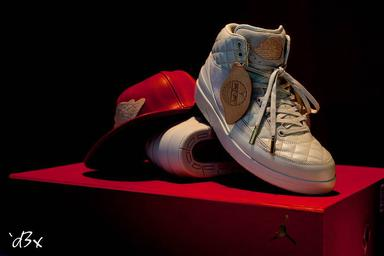

In [46]:
print("Some of our generated Captions: \n")
print('\n \n'.join(map(str, pred)))
img